
=== AEP ===


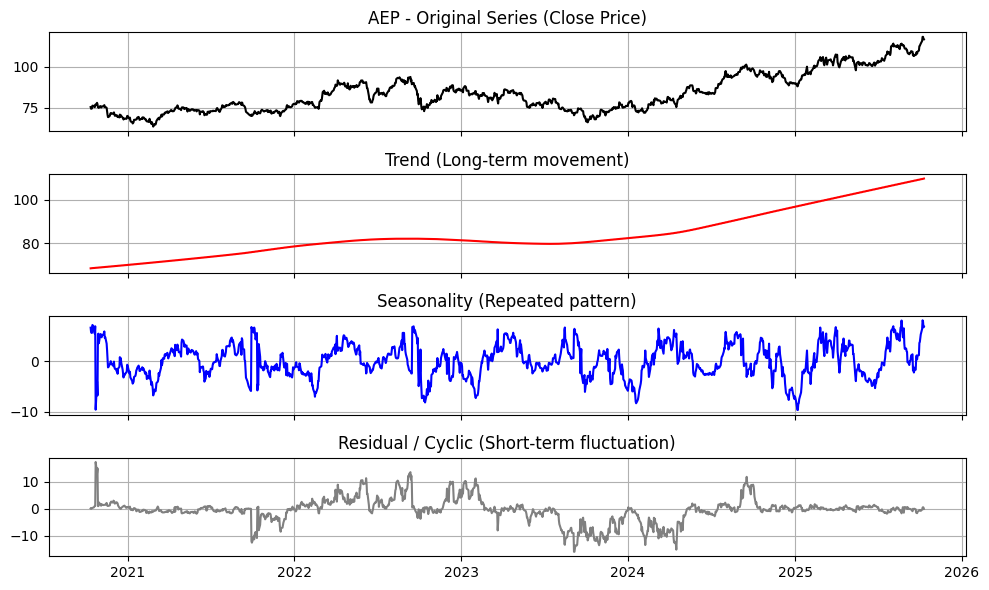


=== DUK ===


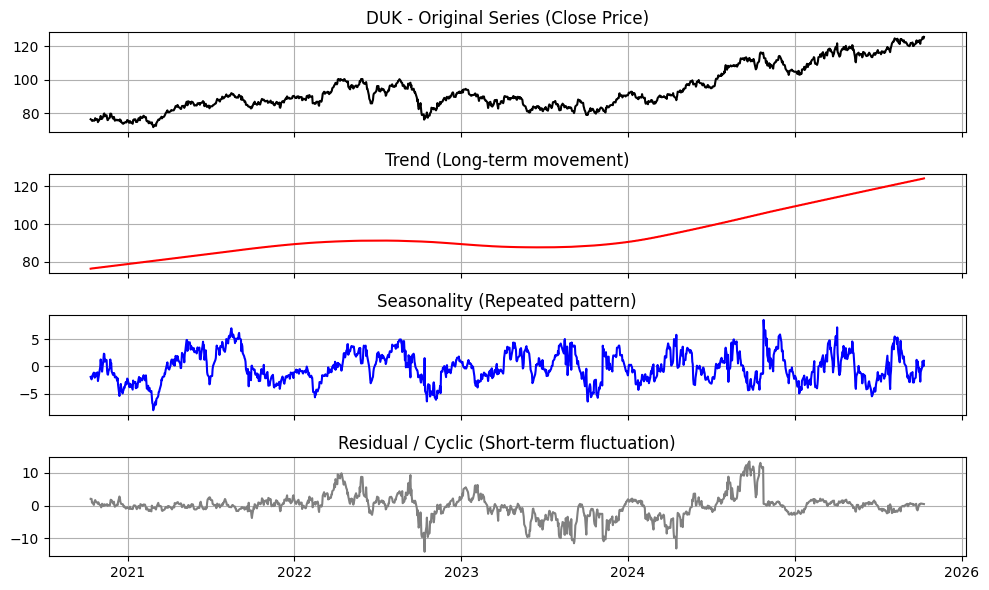


=== SO ===


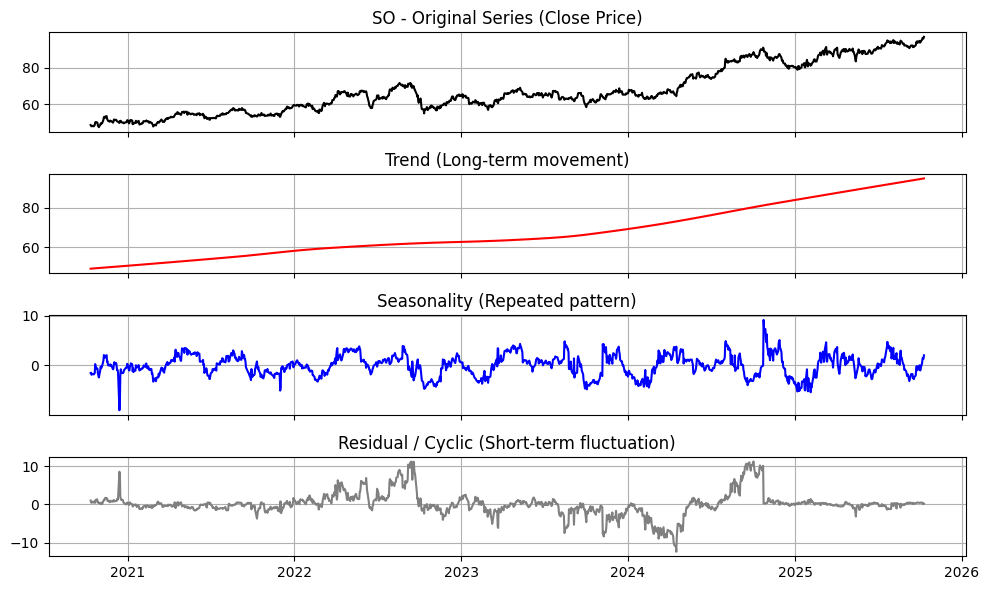


=== ED ===


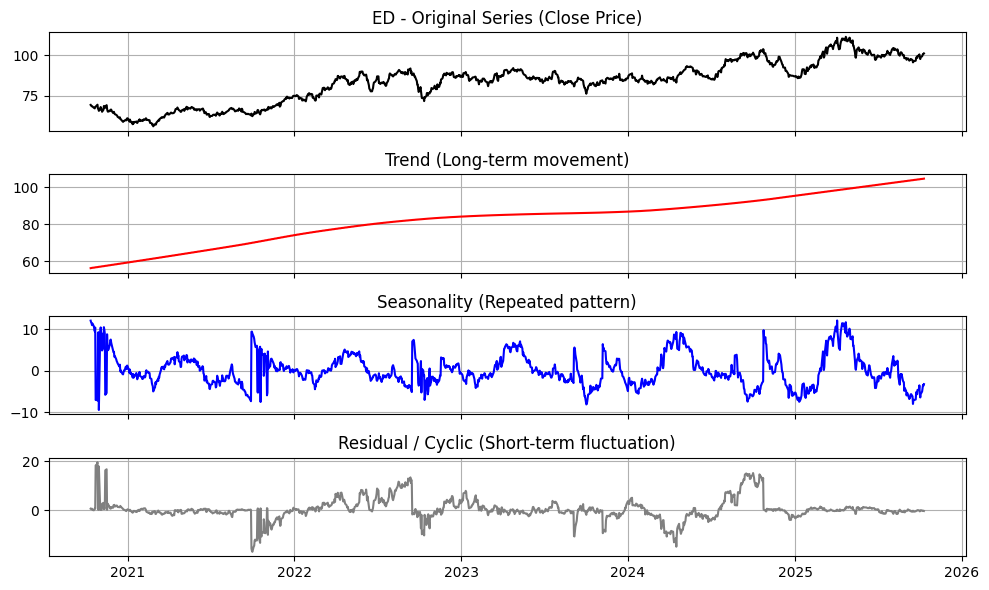


=== EXC ===


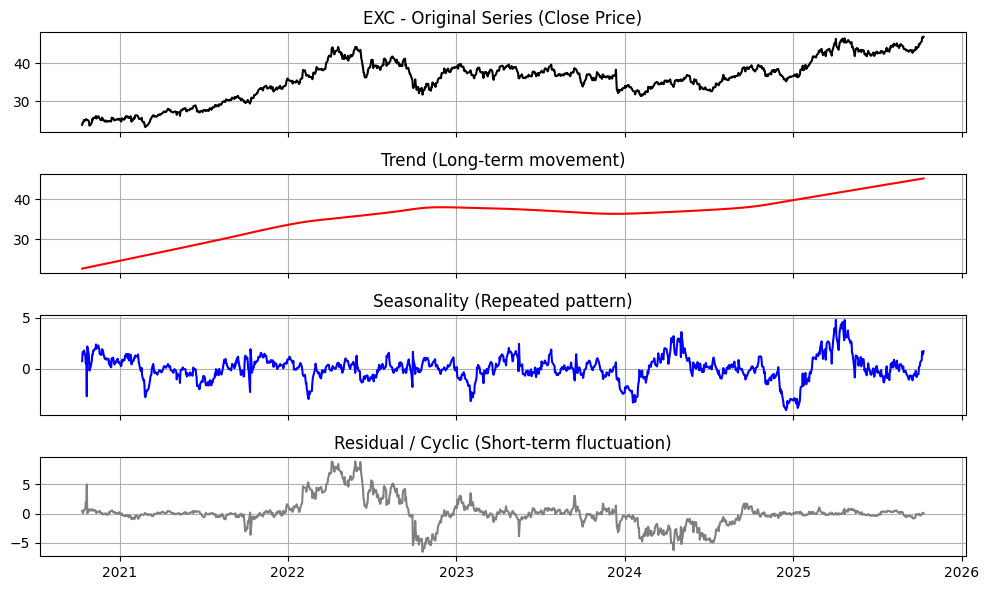

In [34]:
# ===========================================
# Check Trend, Seasonality, and Cyclic (for 5 utility stocks)
# ===========================================
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL

# ---------- CONFIG ----------
TICKERS = ["AEP", "DUK", "SO", "ED", "EXC"]
PERIOD = "5y"

# ---------- DOWNLOAD DATA ----------
data = yf.download(TICKERS, period=PERIOD, auto_adjust=True, progress=False)["Close"]
data = data.asfreq("B").ffill()  # convert to business days

# ---------- STL DECOMPOSITION ----------
for symbol in TICKERS:
    print(f"\n=== {symbol} ===")
    series = data[symbol].dropna()
    
    # ใช้ period = 252 (ประมาณ 1 ปีทำการ)
    stl = STL(series, period=252, robust=True)
    res = stl.fit()
    
    # ---------- PLOT ----------
    fig, axes = plt.subplots(4, 1, figsize=(10, 6), sharex=True)
    axes[0].plot(series, color="black")
    axes[0].set_title(f"{symbol} - Original Series (Close Price)")
    
    axes[1].plot(res.trend, color="red")
    axes[1].set_title("Trend (Long-term movement)")
    
    axes[2].plot(res.seasonal, color="blue")
    axes[2].set_title("Seasonality (Repeated pattern)")
    
    axes[3].plot(res.resid, color="gray")
    axes[3].set_title("Residual / Cyclic (Short-term fluctuation)")
    
    for ax in axes:
        ax.grid(True)
    plt.tight_layout()
    plt.show()


In [35]:
# ===========================================
# Test Stationarity using Augmented Dickey-Fuller (ADF) Test
# ===========================================
import yfinance as yf
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller

# ---------- CONFIG ----------
TICKERS = ["AEP", "DUK", "SO", "ED", "EXC"]
PERIOD = "5y"

# ---------- DOWNLOAD CLOSE PRICES ----------
data = yf.download(TICKERS, period=PERIOD, auto_adjust=True, progress=False)["Close"]
data = data.asfreq("B").ffill()

# ---------- RUN ADF TEST ----------
adf_results = []

for symbol in TICKERS:
    series = data[symbol].dropna()
    log_ret = np.log(series).diff().dropna()  # ใช้ log-return เพื่อทำให้ stationary มากขึ้น

    # Test for Price
    adf_price = adfuller(series, autolag='AIC')
    # Test for Return
    adf_return = adfuller(log_ret, autolag='AIC')

    adf_results.append({
        "Symbol": symbol,
        "ADF Statistic (Price)": round(adf_price[0], 3),
        "p-value (Price)": round(adf_price[1], 4),
        "ADF Statistic (Return)": round(adf_return[0], 3),
        "p-value (Return)": round(adf_return[1], 4),
        "Stationary (Price)": "✅" if adf_price[1] <= 0.05 else "❌",
        "Stationary (Return)": "✅" if adf_return[1] <= 0.05 else "❌"
    })

# ---------- DISPLAY RESULTS ----------
adf_df = pd.DataFrame(adf_results)
print("\n=== Augmented Dickey-Fuller (ADF) Summary ===")
print(adf_df)

# ---------- OPTIONAL: SAVE TO CSV FOR REPORT ----------
adf_df.to_csv("adf_summary.csv", index=False)



=== Augmented Dickey-Fuller (ADF) Summary ===
  Symbol  ADF Statistic (Price)  p-value (Price)  ADF Statistic (Return)  \
0    AEP                 -0.417           0.9073                 -20.417   
1    DUK                 -0.730           0.8388                 -35.948   
2     SO                 -0.298           0.9258                 -27.038   
3     ED                 -1.249           0.6524                 -35.921   
4    EXC                 -1.648           0.4580                 -35.606   

   p-value (Return) Stationary (Price) Stationary (Return)  
0               0.0                  ❌                   ✅  
1               0.0                  ❌                   ✅  
2               0.0                  ❌                   ✅  
3               0.0                  ❌                   ✅  
4               0.0                  ❌                   ✅  


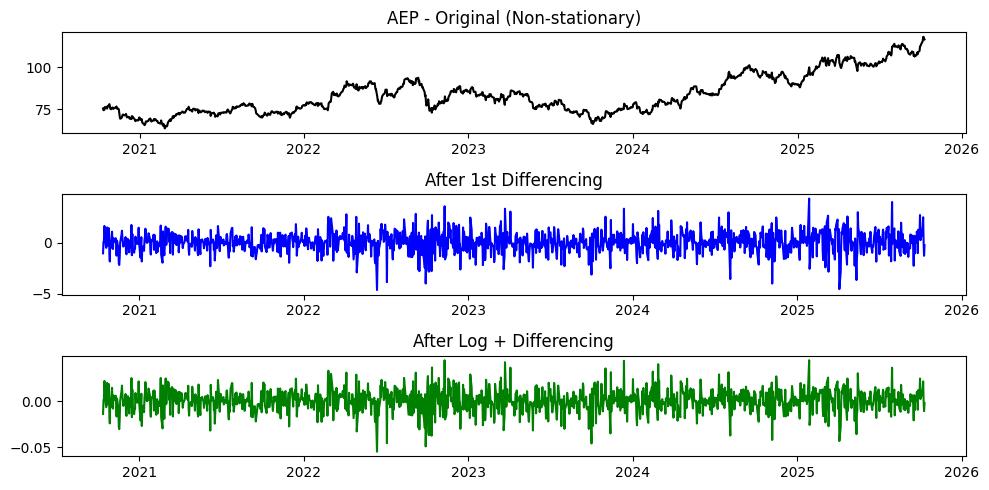

In [36]:
import matplotlib.pyplot as plt
import numpy as np

symbol = "AEP"
series = data[symbol]
diff_series = series.diff().dropna()
log_diff = np.log(series).diff().dropna()

plt.figure(figsize=(10,5))
plt.subplot(3,1,1)
plt.plot(series, color="black"); plt.title(f"{symbol} - Original (Non-stationary)")
plt.subplot(3,1,2)
plt.plot(diff_series, color="blue"); plt.title("After 1st Differencing")
plt.subplot(3,1,3)
plt.plot(log_diff, color="green"); plt.title("After Log + Differencing")
plt.tight_layout()
plt.show()


[*********************100%***********************]  1 of 1 completed


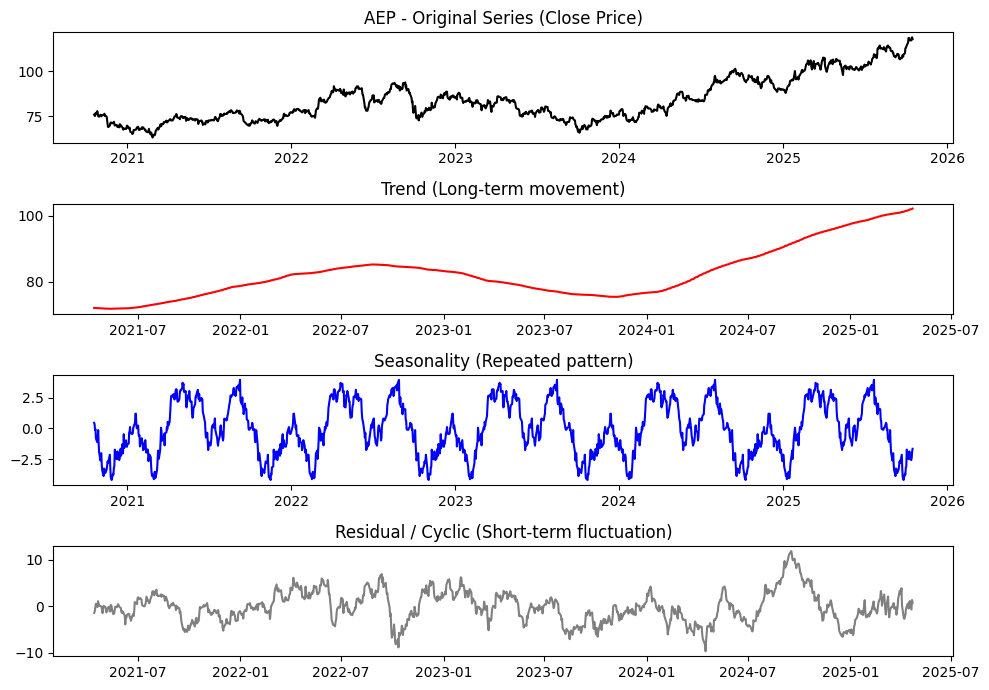

In [8]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# ---------- 1️⃣ โหลดข้อมูลหุ้น ----------
symbol = "AEP"   # สามารถเปลี่ยนเป็น DUK, SO, ED, EXC ได้
data = yf.download(symbol, period="5y", auto_adjust=True)["Close"]

# ---------- 2️⃣ แปลงเป็น Time Series แบบรายวัน ----------
data = data.asfreq("B")    # B = Business Day
data = data.ffill()        # เติมค่าหายด้วย forward fill

# ---------- 3️⃣ ใช้ seasonal_decompose แยกองค์ประกอบ ----------
# period=252 ≈ 1 ปีทำการ (252 วัน)
result = seasonal_decompose(data, model="additive", period=252)

# ---------- 4️⃣ สร้างกราฟสวย ๆ ----------
plt.figure(figsize=(10,7))

plt.subplot(4,1,1)
plt.plot(data, color='black')
plt.title(f"{symbol} - Original Series (Close Price)", fontsize=12)

plt.subplot(4,1,2)
plt.plot(result.trend, color='red')
plt.title("Trend (Long-term movement)", fontsize=12)

plt.subplot(4,1,3)
plt.plot(result.seasonal, color='blue')
plt.title("Seasonality (Repeated pattern)", fontsize=12)

plt.subplot(4,1,4)
plt.plot(result.resid, color='gray')
plt.title("Residual / Cyclic (Short-term fluctuation)", fontsize=12)

plt.tight_layout()
plt.show()


In [49]:
import yfinance as yf
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# ---------- โหลดข้อมูล ----------
TICKERS = ["AEP", "DUK", "SO", "ED", "EXC"]
data = yf.download(TICKERS, period="5y", auto_adjust=True)["Close"]

# ---------- สร้างตารางเก็บผล ----------
results = []

for symbol in TICKERS:
    series = data[symbol].dropna()
    returns = series.pct_change().dropna()

    # ADF Test (Price)
    adf_price = adfuller(series)
    adf_stat_price = adf_price[0]
    pval_price = adf_price[1]

    # ADF Test (Return)
    adf_ret = adfuller(returns)
    adf_stat_ret = adf_ret[0]
    pval_ret = adf_ret[1]

    results.append({
        "Symbol": symbol,
        "ADF Price": round(adf_stat_price, 3),
        "p-value Price": f"{pval_price:.3f}",
        # "ADF Return": round(adf_stat_ret, 3),
        # "p-value Return": f"{pval_ret:.3e}"
    })

# ---------- แสดงผล ----------
df_adf = pd.DataFrame(results)
print("\n=== Augmented Dickey-Fuller (ADF) Summary ===")
print(df_adf)

df_adf

[*********************100%***********************]  5 of 5 completed



=== Augmented Dickey-Fuller (ADF) Summary ===
  Symbol  ADF Price p-value Price
0    AEP     -0.456         0.900
1    DUK     -0.738         0.837
2     SO     -0.284         0.928
3     ED     -1.248         0.653
4    EXC     -1.644         0.460


,Symbol,ADF Price,p-value Price
0,AEP,-0.456,0.900
1,DUK,-0.738,0.837
2,SO,-0.284,0.928
3,ED,-1.248,0.653
4,EXC,-1.644,0.460


[*********************100%***********************]  1 of 1 completed


=== BEFORE Differencing ===
ADF Statistic: -0.454
p-value: 9.007e-01
❌ Non-Stationary

=== AFTER Differencing ===
ADF Statistic: -20.381
p-value: 0.000e+00
✅ Stationary หลัง differencing


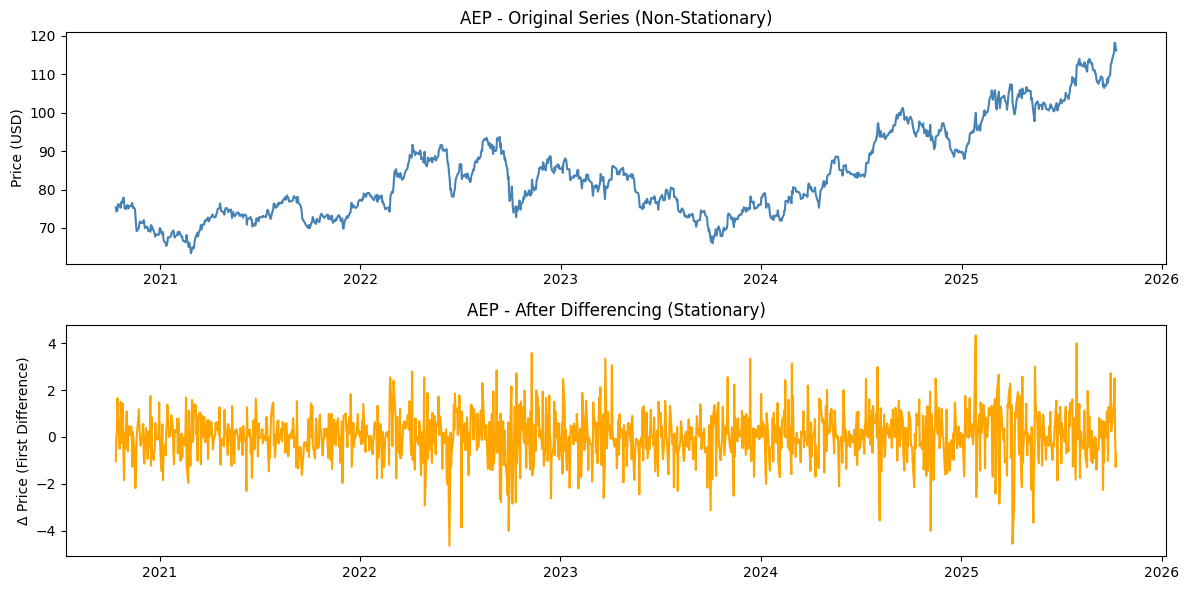

In [47]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# ---------- 1️⃣ โหลดข้อมูล ----------
symbol = "AEP"
data = yf.download(symbol, period="5y", auto_adjust=True)["Close"]
data = data.asfreq("B").ffill()  # ใช้เฉพาะวันทำการและเติมค่าหาย

# ---------- 2️⃣ ทดสอบ ADF ก่อนทำ differencing ----------
result_before = adfuller(data.dropna())
print("=== BEFORE Differencing ===")
print(f"ADF Statistic: {result_before[0]:.3f}")
print(f"p-value: {result_before[1]:.3e}")
if result_before[1] < 0.05:
    print("✅ Stationary")
else:
    print("❌ Non-Stationary")

# ---------- 3️⃣ ทำ Differencing ----------
data_diff = data.diff().dropna()

# ---------- 4️⃣ ทดสอบ ADF หลัง differencing ----------
result_after = adfuller(data_diff)
print("\n=== AFTER Differencing ===")
print(f"ADF Statistic: {result_after[0]:.3f}")
print(f"p-value: {result_after[1]:.3e}")
if result_after[1] < 0.05:
    print("✅ Stationary หลัง differencing")
else:
    print("❌ ยังไม่ stationary")

# ---------- 5️⃣ แสดงกราฟ Before vs After ----------
plt.figure(figsize=(12,6))

plt.subplot(2,1,1)
plt.plot(data, color="steelblue")
plt.title(f"{symbol} - Original Series (Non-Stationary)", fontsize=12)
plt.ylabel("Price (USD)")

plt.subplot(2,1,2)
plt.plot(data_diff, color="orange")
plt.title(f"{symbol} - After Differencing (Stationary)", fontsize=12)
plt.ylabel("Δ Price (First Difference)")

plt.tight_layout()
plt.show()
